In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import platform

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 로드 및 확인

In [2]:
df_data = pd.read_csv("./data/vgchartz-2024.csv")

In [3]:
df_data

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


# 결측 데이터 처리
- 데이터 확인 작업에서 출시 날짜와 마지막 업데이트 날짜의 사용 통일
- 출시 날짜가 없을 경우 마지막 업데이트 날짜 적용, 후 마지막 업데이트 날짜 삭제

In [4]:
df_data[df_data['release_date'].isna()]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
595,/games/boxart/full_6721404JapanFrontccc.jpg,Gran Turismo Concept 2001 Tokyo,PS2,Racing,Unknown,Polyphony Digital,NaN,1.84,NaN,0.42,1.10,0.33,NaN,NaN
4016,/games/boxart/full_tera_476AmericaFront.jpg,TERA,PC,Role-Playing,Unknown,En Masse,NaN,0.42,0.25,NaN,0.13,0.04,NaN,NaN
4662,/games/boxart/full_dragon-ball-z-budokai-tenka...,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,Action,Unknown,Unknown,NaN,0.35,0.15,0.14,0.05,0.01,NaN,NaN
4846,/games/boxart/full_9253015JapanFrontccc.jpg,Custom Robo,N64,Fighting,Unknown,Noise Inc.,NaN,0.33,NaN,0.29,NaN,0.04,NaN,NaN
6075,/games/boxart/full_jonah-lomu-rugby-challenge_...,Jonah Lomu Rugby Challenge,PS3,Sports,Home Entertainment Suppliers,Sidhe Interactive,NaN,0.25,NaN,NaN,0.20,0.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63982,/games/boxart/full_6855581AmericaFrontccc.jpg,The Wreck,PC,Visual Novel,Unknown,The Pixel Hunt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-13
63983,/games/boxart/full_3646233AmericaFrontccc.jpg,The Wreck,PS4,Visual Novel,Unknown,The Pixel Hunt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-13
63984,/games/boxart/full_5400641AmericaFrontccc.jpg,The Wreck,PS5,Visual Novel,Unknown,The Pixel Hunt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-13
64003,/games/boxart/full_8639221AmericaFrontccc.jpg,Witch on the Holy Night,NS,Visual Novel,Unknown,Type-Moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-05


In [5]:
# release_date가 NaN인 경우 last_update로 대체
df_data['release_date'] = df_data['release_date'].fillna(df_data['last_update'])

In [6]:
df_data[df_data['release_date'].isna()]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
595,/games/boxart/full_6721404JapanFrontccc.jpg,Gran Turismo Concept 2001 Tokyo,PS2,Racing,Unknown,Polyphony Digital,NaN,1.84,NaN,0.42,1.10,0.33,NaN,NaN
4016,/games/boxart/full_tera_476AmericaFront.jpg,TERA,PC,Role-Playing,Unknown,En Masse,NaN,0.42,0.25,NaN,0.13,0.04,NaN,NaN
4662,/games/boxart/full_dragon-ball-z-budokai-tenka...,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,Action,Unknown,Unknown,NaN,0.35,0.15,0.14,0.05,0.01,NaN,NaN
4846,/games/boxart/full_9253015JapanFrontccc.jpg,Custom Robo,N64,Fighting,Unknown,Noise Inc.,NaN,0.33,NaN,0.29,NaN,0.04,NaN,NaN
6075,/games/boxart/full_jonah-lomu-rugby-challenge_...,Jonah Lomu Rugby Challenge,PS3,Sports,Home Entertainment Suppliers,Sidhe Interactive,NaN,0.25,NaN,NaN,0.20,0.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63239,/games/boxart/full_1372167PALFrontccc.jpg,Worms World Party,GIZ,Strategy,Unknown,Team17 Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63243,/games/boxart/default.jpg,Worms: Ultimate Mayhem,PSN,Strategy,Unknown,Team17 Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63255,/games/boxart/default.jpg,XIII Century: Blood of Europe,PC,Strategy,Unknown,Unicorn Games Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63271,/games/boxart/full_zeus-ii-carnage-heart_9Japa...,Zeus II: Carnage Heart,PSN,Strategy,Unknown,ArtDink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 1752개의 출시 날짜를 알 수 없는 데이터 항목 존재
- 전체적인 흐름을 알기 위한 필수 데이터는 아님 -> 삭제 처리

In [7]:
# NaN 항목이 있는 행 삭제
df_data = df_data.dropna(subset=['release_date'])

- 최근 업데이트 날짜 열 삭제 및 시각화를 위한 데이트타임 형식으로 변환

In [8]:
df_data = df_data.drop(columns='last_update')

In [9]:
# release_date를 datetime 형식으로 변환한 후 YYYY-MM 형식으로 변환
df_data['release_date'] = pd.to_datetime(df_data['release_date'], errors='coerce').dt.strftime('%Y-%m')

In [45]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28081 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           28081 non-null  object 
 1   title         28081 non-null  object 
 2   console       28081 non-null  object 
 3   genre         28081 non-null  object 
 4   publisher     28081 non-null  object 
 5   developer     28079 non-null  object 
 6   critic_score  2302 non-null   float64
 7   total_sales   7138 non-null   float64
 8   na_sales      4283 non-null   float64
 9   jp_sales      3249 non-null   float64
 10  pal_sales     4115 non-null   float64
 11  other_sales   5240 non-null   float64
 12  release_date  28081 non-null  object 
 13  release_year  28081 non-null  int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 3.1+ MB


- 1차 가공 후 크리틱 스코어와 판매량에서 상당량의 결측치를 확인
- 이는 장르 트렌드 파악에 필요한 부분이라 삭제나 대체하지 않고 NaN값을 유지하여 시각적 처리를 통해 컨트롤

# 시각화

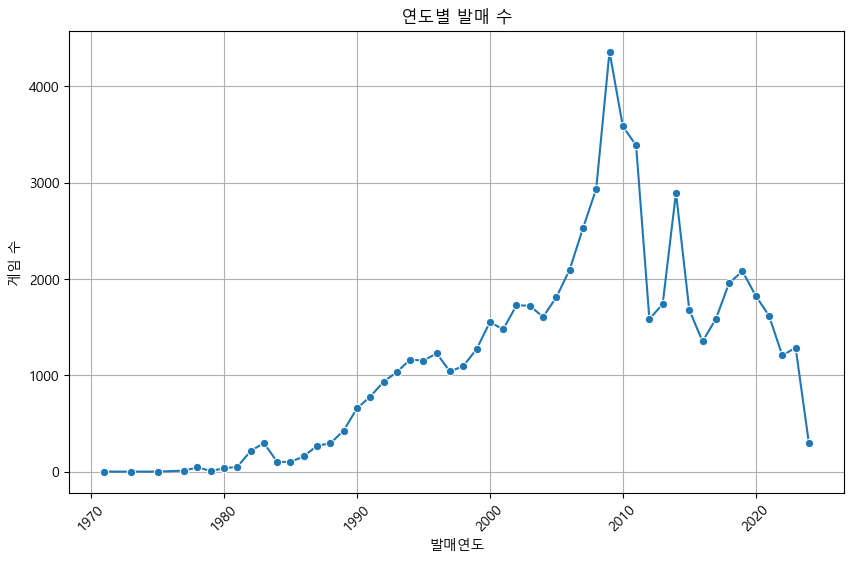

In [11]:
# 'release_date'를 연도로 변환하고, 게임 수를 집계
df_data['release_year'] = pd.to_datetime(df_data['release_date']).dt.year
game_counts = df_data.groupby('release_year').size().reset_index(name='count')

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=game_counts, x='release_year', y='count', marker='o')
plt.title('연도별 발매 수')
plt.xlabel('발매연도')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.grid()
plt.show()

- 1970년대부터의 데이터가 쌓여있어 과거데이터가 분석에 혼동을 줄 수 있을 것으로 생각됨
    - 최신 트렌드를 확인하기 위해 2010년 이후 데이터만 추합하여 사용

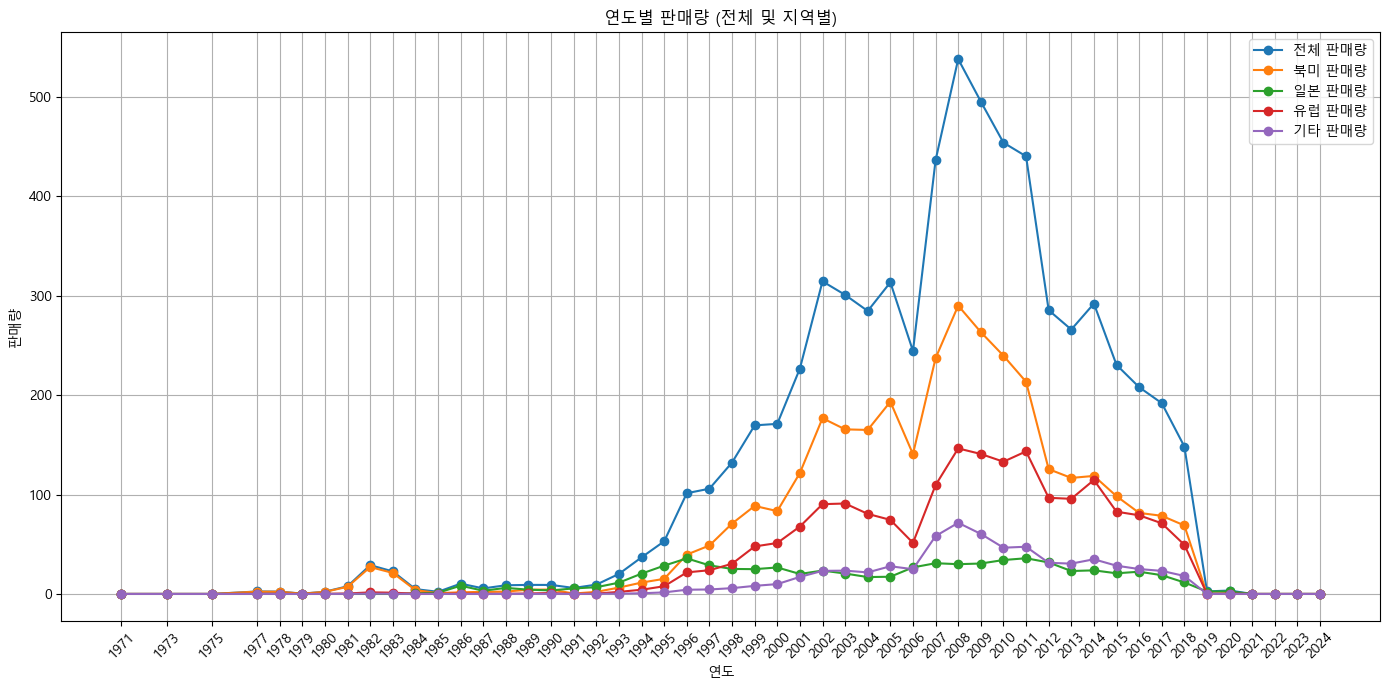

In [12]:
# 연도별로 판매량 집계
sales_by_year = df_data.groupby('release_year').agg({
    'total_sales': 'sum',
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# 시각화
plt.figure(figsize=(14, 7))

# 전체 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['total_sales'], label='전체 판매량', marker='o')

# 북미 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['na_sales'], label='북미 판매량', marker='o')

# 일본 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['jp_sales'], label='일본 판매량', marker='o')

# 유럽 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['pal_sales'], label='유럽 판매량', marker='o')

# 기타 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['other_sales'], label='기타 판매량', marker='o')

# 그래프 설정
plt.title('연도별 판매량 (전체 및 지역별)')
plt.xlabel('연도')
plt.ylabel('판매량')
plt.legend()
plt.xticks(sales_by_year['release_year'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
df_data = df_data.query('release_year >= 2010')

# 데이터 시각화 분석

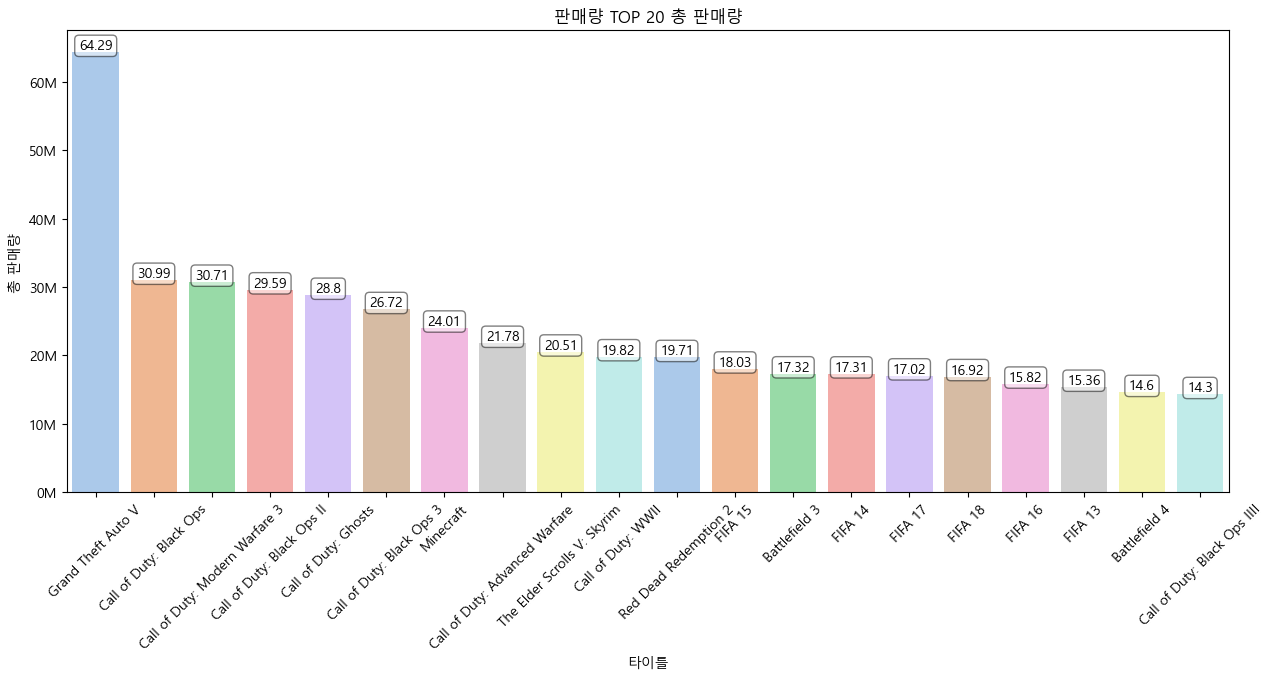

In [14]:
# 상위 10개 판매 게임을 계산
top_selling_games = df_data.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(20)

# 데이터프레임으로 변환
top_selling_games_df = top_selling_games.reset_index()

# 시각화
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top_selling_games_df, x='title', y='total_sales', palette='pastel')

# 모든 막대에 레이블 추가
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('판매량 TOP 20 총 판매량')
plt.xlabel('타이틀')
plt.ylabel('총 판매량')
plt.xticks(rotation=45)
plt.show()

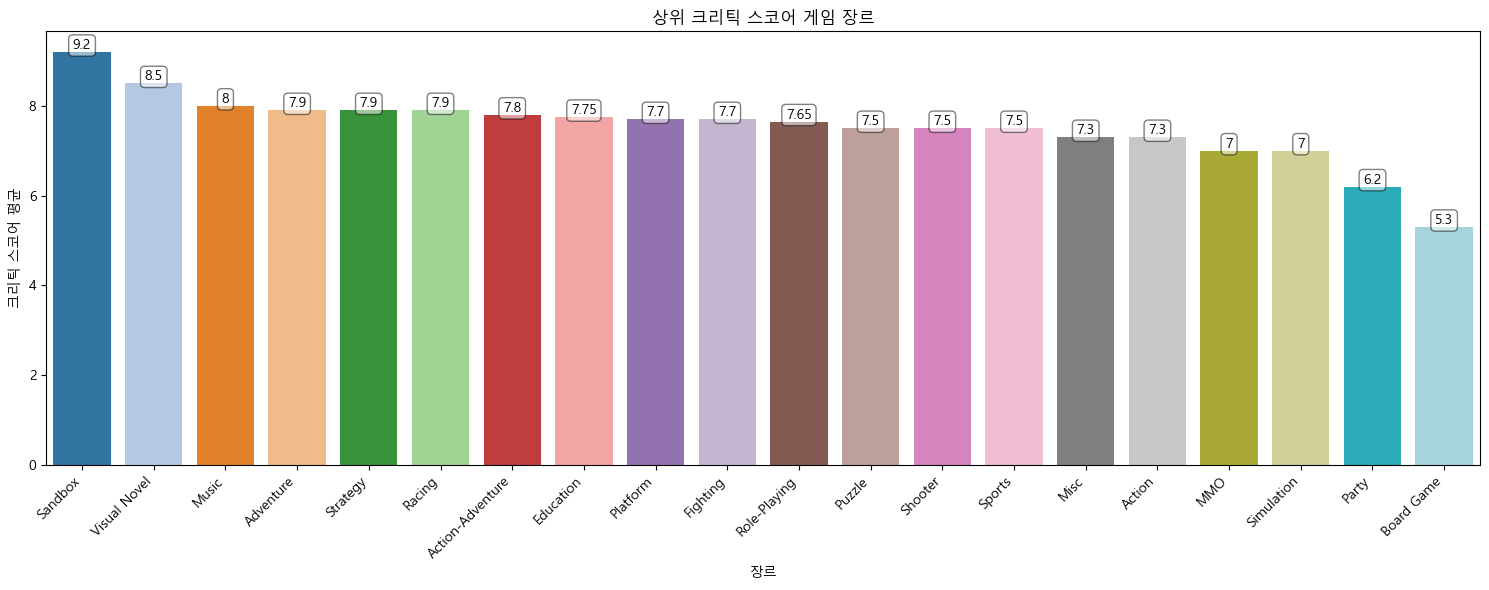

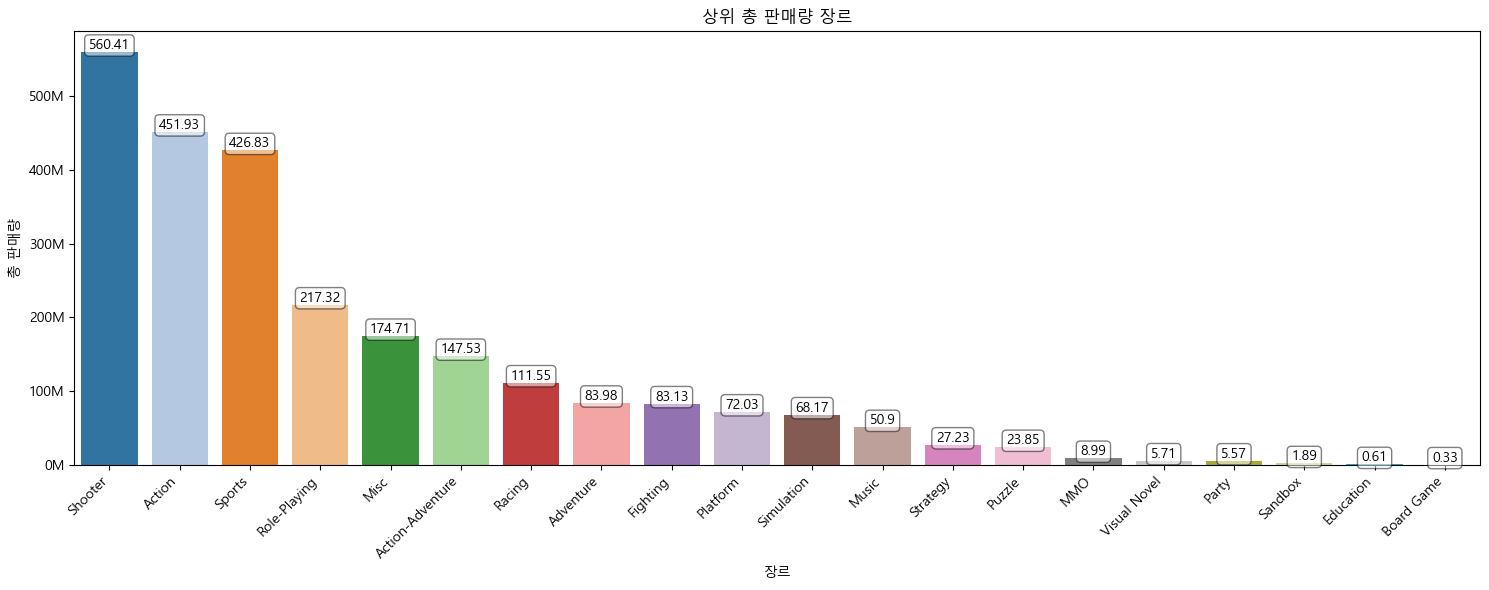

In [15]:
genre_stats=df_data.groupby('genre').agg({
    'critic_score':'median',
    'total_sales':'sum'
})
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='total_sales',ascending=False)

palette = sns.color_palette("tab20", len(sorted_genres_by_score))

plt.figure(figsize=(15, 6))
ax=sns.barplot(x=sorted_genres_by_score.index, y=sorted_genres_by_score['critic_score'], palette=palette)

# 모든 막대에 레이블 추가
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.title('상위 크리틱 스코어 게임 장르')
plt.xlabel('장르')
plt.ylabel('크리틱 스코어 평균')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
ax=sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'], palette=palette)

# 모든 막대에 레이블 추가
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('상위 총 판매량 장르')
plt.xlabel('장르')
plt.ylabel('총 판매량')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

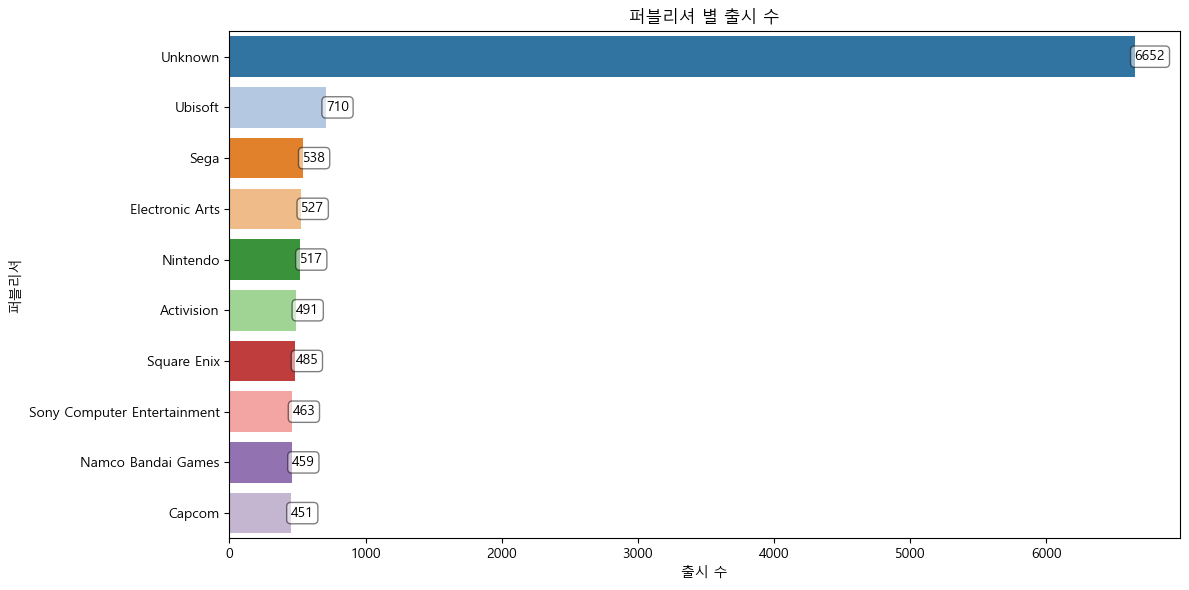

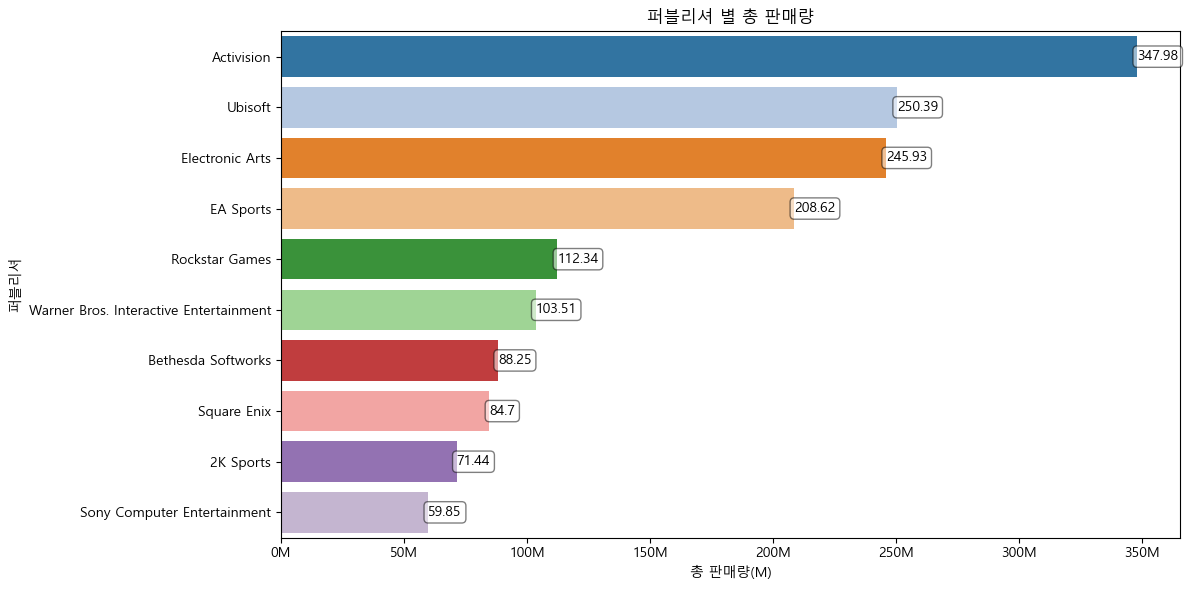

In [16]:
# 퍼블리셔별 통계 집계
publisher_stats = df_data.groupby('publisher').agg({
    'title': 'count',         # 발매된 게임 수
    'total_sales': 'sum'      # 총 판매량
}).reset_index()

# 발매 수 기준으로 상위 10개 출판사 정렬
sorted_publishers_by_num = publisher_stats.sort_values(by='title', ascending=False).head(10)
# 판매량 기준으로 상위 10개 출판사 정렬
sorted_publishers_by_sales = publisher_stats.sort_values(by='total_sales', ascending=False).head(10)

# 색상 팔레트 설정
palette = sns.color_palette("tab20", len(sorted_publishers_by_num))

# 발매 수에 대한 막대 그래프
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num, palette=palette)
# 모든 막대에 레이블 추가
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('퍼블리셔 별 출시 수')
plt.xlabel('출시 수')
plt.ylabel('퍼블리셔')
plt.tight_layout()
plt.show()

# 판매 실적에 대한 막대 그래프
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)
# 모든 막대에 레이블 추가
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

# 판매량을 M 단위로 표시
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('퍼블리셔 별 총 판매량')
plt.xlabel('총 판매량(M)')
plt.ylabel('퍼블리셔')
plt.tight_layout()
plt.show()

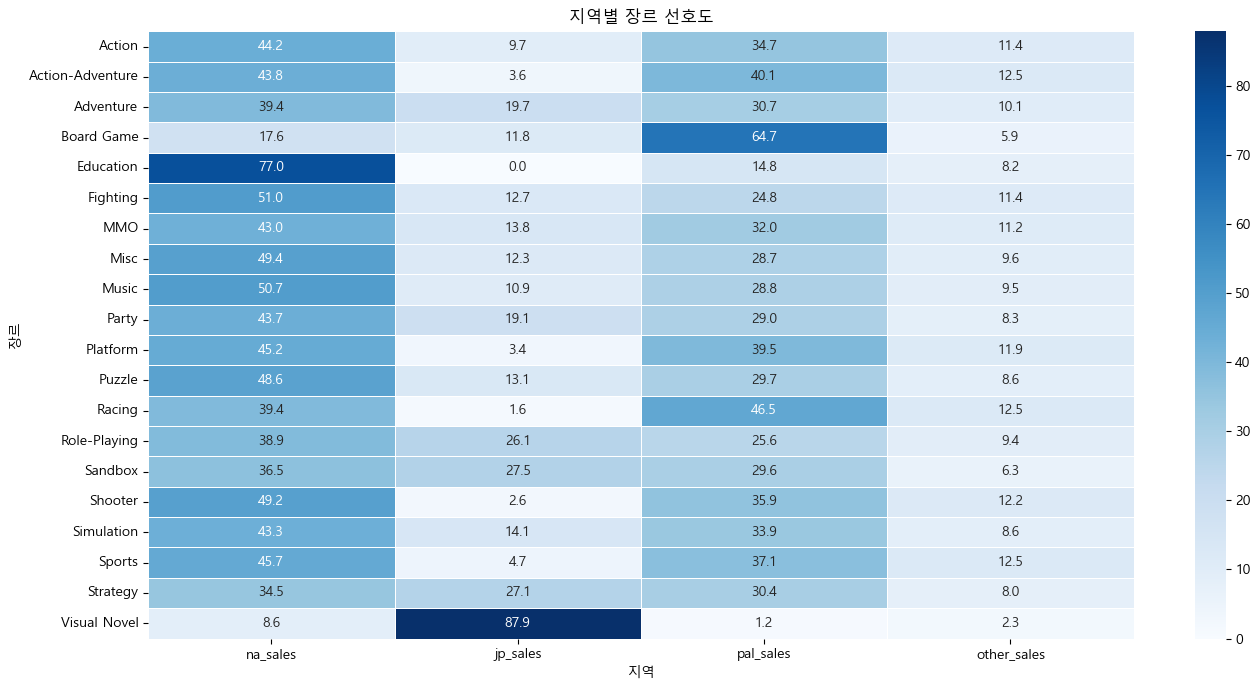

In [17]:
# 장르별 판매량 집계
genre_sales = df_data.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# 판매량을 백분율로 정규화
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# 히트맵 그리기
plt.figure(figsize=(14, 7))
sns.heatmap(genre_sales_normalized, cmap='Blues', annot=True, fmt='.1f', linewidths=.5)
plt.title('지역별 장르 선호도')
plt.xlabel('지역')
plt.ylabel('장르')
plt.tight_layout()
plt.show()

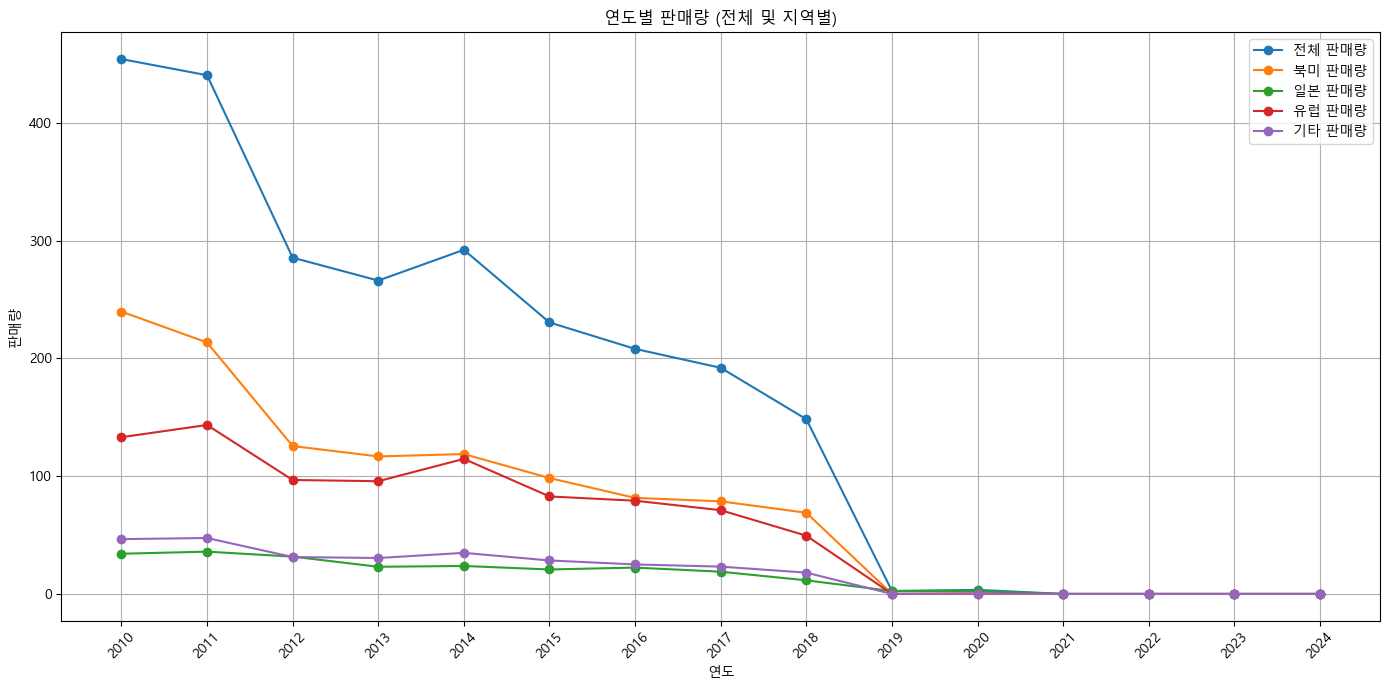

In [18]:
# 연도별로 판매량 집계
sales_by_year = df_data.groupby('release_year').agg({
    'total_sales': 'sum',
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# 시각화
plt.figure(figsize=(14, 7))

# 전체 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['total_sales'], label='전체 판매량', marker='o')

# 북미 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['na_sales'], label='북미 판매량', marker='o')

# 일본 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['jp_sales'], label='일본 판매량', marker='o')

# 유럽 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['pal_sales'], label='유럽 판매량', marker='o')

# 기타 판매량
plt.plot(sales_by_year['release_year'], sales_by_year['other_sales'], label='기타 판매량', marker='o')

# 그래프 설정
plt.title('연도별 판매량 (전체 및 지역별)')
plt.xlabel('연도')
plt.ylabel('판매량')
plt.legend()
plt.xticks(sales_by_year['release_year'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

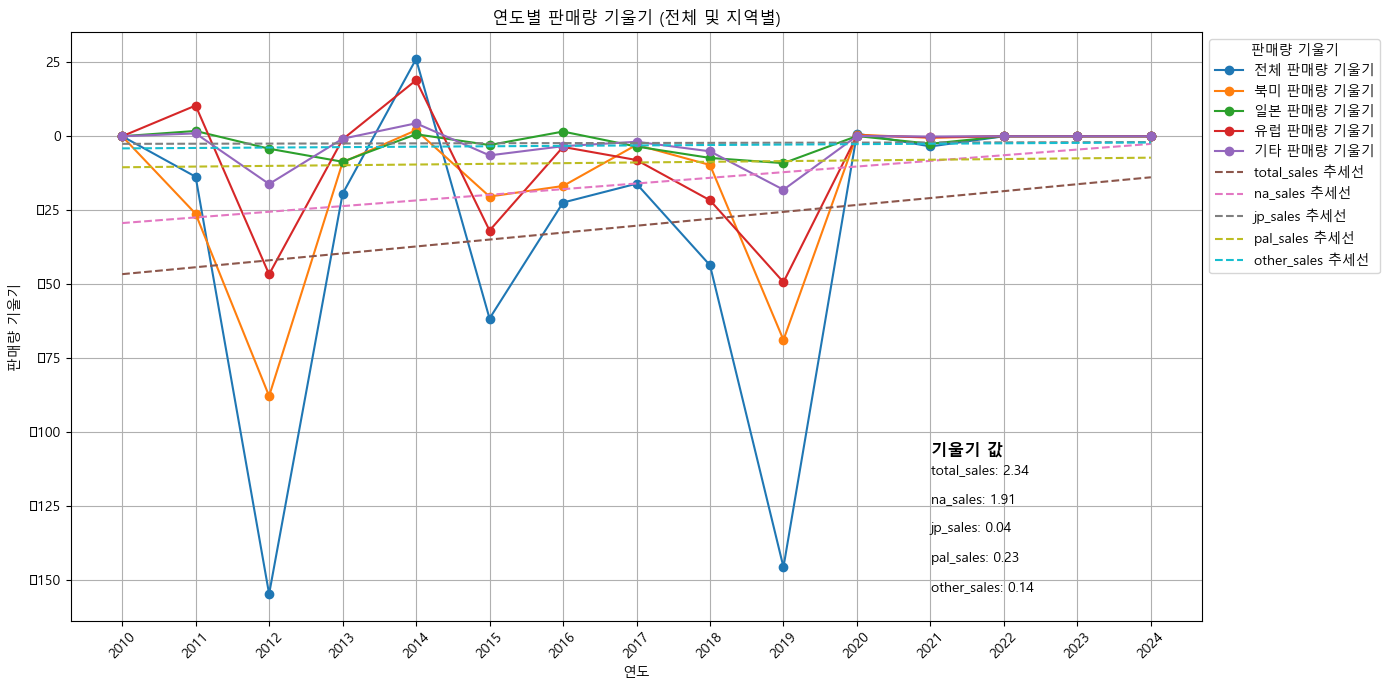

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# 연도별 판매량 집계
sales_by_year = df_data.groupby('release_year').agg({
    'total_sales': 'sum',
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# 연도별 판매량의 차이(기울기) 계산
sales_diff = sales_by_year[['release_year', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].diff().fillna(0)

# 시각화
plt.figure(figsize=(14, 7))

# 판매량 기울기 시각화
plt.plot(sales_by_year['release_year'], sales_diff['total_sales'], label='전체 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['na_sales'], label='북미 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['jp_sales'], label='일본 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['pal_sales'], label='유럽 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['other_sales'], label='기타 판매량 기울기', marker='o')

# 기울기 값을 저장할 딕셔너리
slopes = {}

# 추세선 추가 및 기울기 계산
for column in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    z = np.polyfit(sales_by_year['release_year'], sales_diff[column], 1)
    p = np.poly1d(z)
    plt.plot(sales_by_year['release_year'], p(sales_by_year['release_year']), linestyle='--', label=f'{column} 추세선')

    # 기울기를 저장
    slopes[column] = z[0]

# 그래프 설정
plt.title('연도별 판매량 기울기 (전체 및 지역별)')
plt.xlabel('연도')
plt.ylabel('판매량 기울기')
plt.xticks(sales_by_year['release_year'], rotation=45)
plt.grid()

# 목차 스타일의 기울기 박스 추가
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='판매량 기울기')

# 기울기 값을 담을 박스 추가
plt.gca().add_artist(plt.Rectangle((0.75, 0.15), 0.2, 0.25, transform=plt.gca().transAxes, color='white', alpha=0.8, edgecolor='black'))
plt.text(0.76, 0.28, '기울기 값', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)

# 기울기 값 추가
for i, (key, value) in enumerate(slopes.items()):
    plt.text(0.76, 0.25 - (i * 0.05), f'{key}: {value:.2f}', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

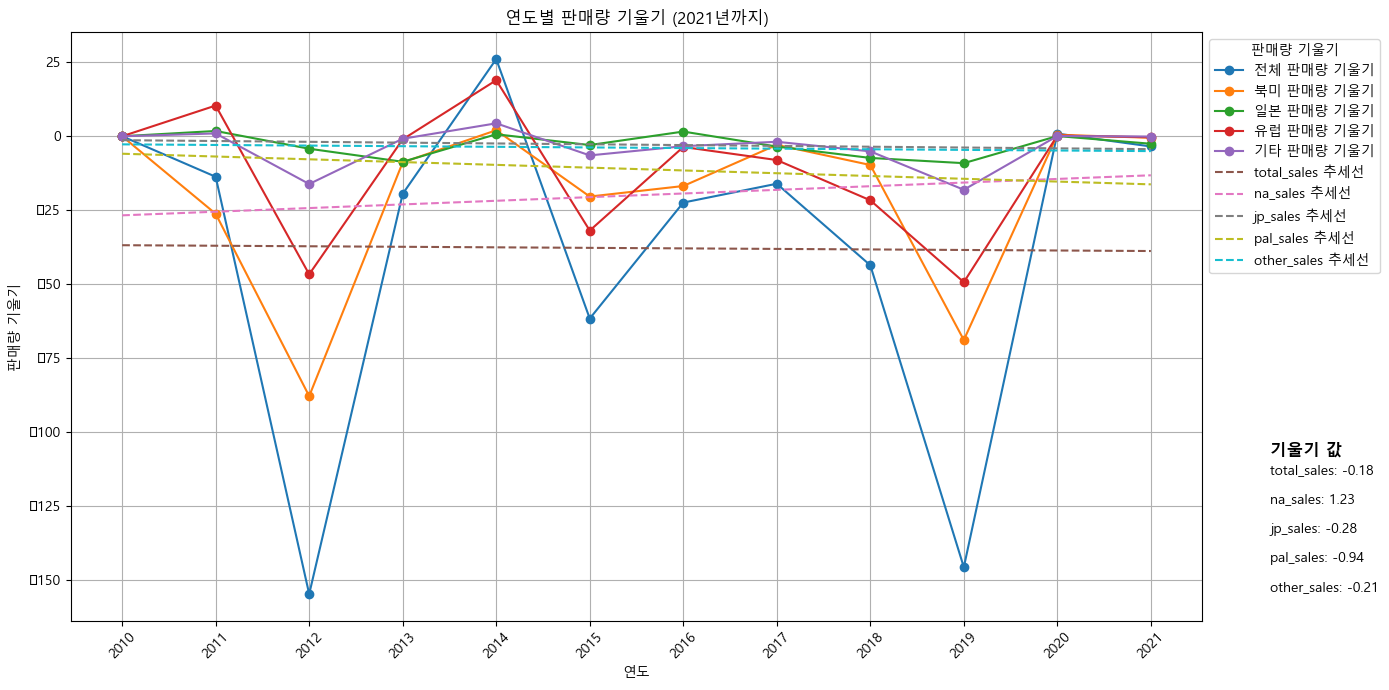

In [41]:
# 연도별 판매량 집계
sales_by_year = df_data.groupby('release_year').agg({
    'total_sales': 'sum',
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# 2019년까지만 필터링
sales_by_year = sales_by_year[sales_by_year['release_year'] <= 2021]

# 연도별 판매량의 차이(기울기) 계산
sales_diff = sales_by_year[['release_year', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].diff().fillna(0)

# 시각화
plt.figure(figsize=(14, 7))

# 판매량 기울기 시각화
plt.plot(sales_by_year['release_year'], sales_diff['total_sales'], label='전체 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['na_sales'], label='북미 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['jp_sales'], label='일본 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['pal_sales'], label='유럽 판매량 기울기', marker='o')
plt.plot(sales_by_year['release_year'], sales_diff['other_sales'], label='기타 판매량 기울기', marker='o')

# 기울기 값을 저장할 딕셔너리
slopes = {}

# 추세선 추가 및 기울기 계산
for column in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    z = np.polyfit(sales_by_year['release_year'], sales_diff[column], 1)
    p = np.poly1d(z)
    plt.plot(sales_by_year['release_year'], p(sales_by_year['release_year']), linestyle='--', label=f'{column} 추세선')

    # 기울기를 저장
    slopes[column] = z[0]

# 그래프 설정
plt.title('연도별 판매량 기울기 (2021년까지)')
plt.xlabel('연도')
plt.ylabel('판매량 기울기')
plt.xticks(sales_by_year['release_year'], rotation=45)
plt.grid()

# 목차 스타일의 기울기 박스 추가
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='판매량 기울기')

# 기울기 값을 담을 박스 추가 (그래프 외부)
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white')
plt.gca().add_artist(plt.Rectangle((1.05, 0.15), 0.2, 0.25, transform=plt.gca().transAxes, color='white', alpha=0.8, edgecolor='black'))

plt.text(1.06, 0.28, '기울기 값', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)

# 기울기 값 추가
for i, (key, value) in enumerate(slopes.items()):
    plt.text(1.06, 0.25 - (i * 0.05), f'{key}: {value:.2f}', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

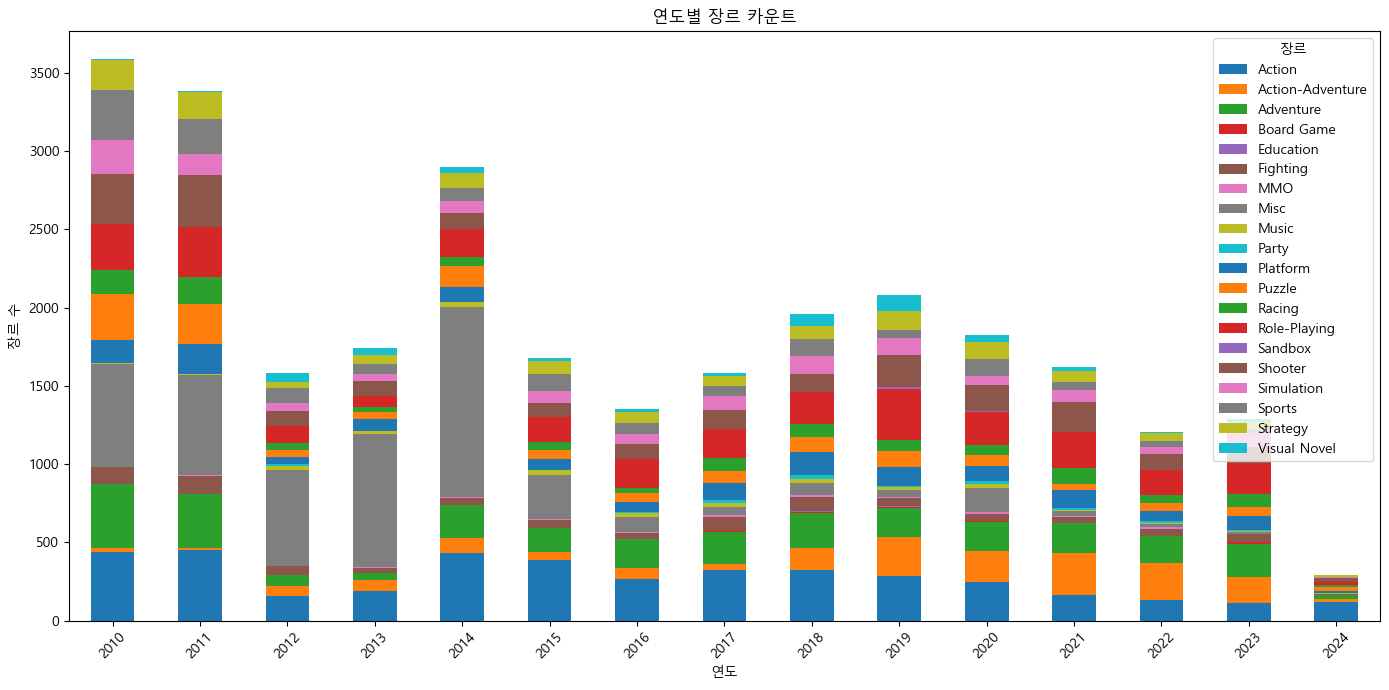

In [20]:
# 연도별 장르 카운트
genre_counts_by_year = df_data.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(14, 7))
genre_counts_by_year.plot(kind='bar', stacked=True, ax=plt.gca())

# 그래프 설정
plt.title('연도별 장르 카운트')
plt.xlabel('연도')
plt.ylabel('장르 수')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.tight_layout()
plt.show()

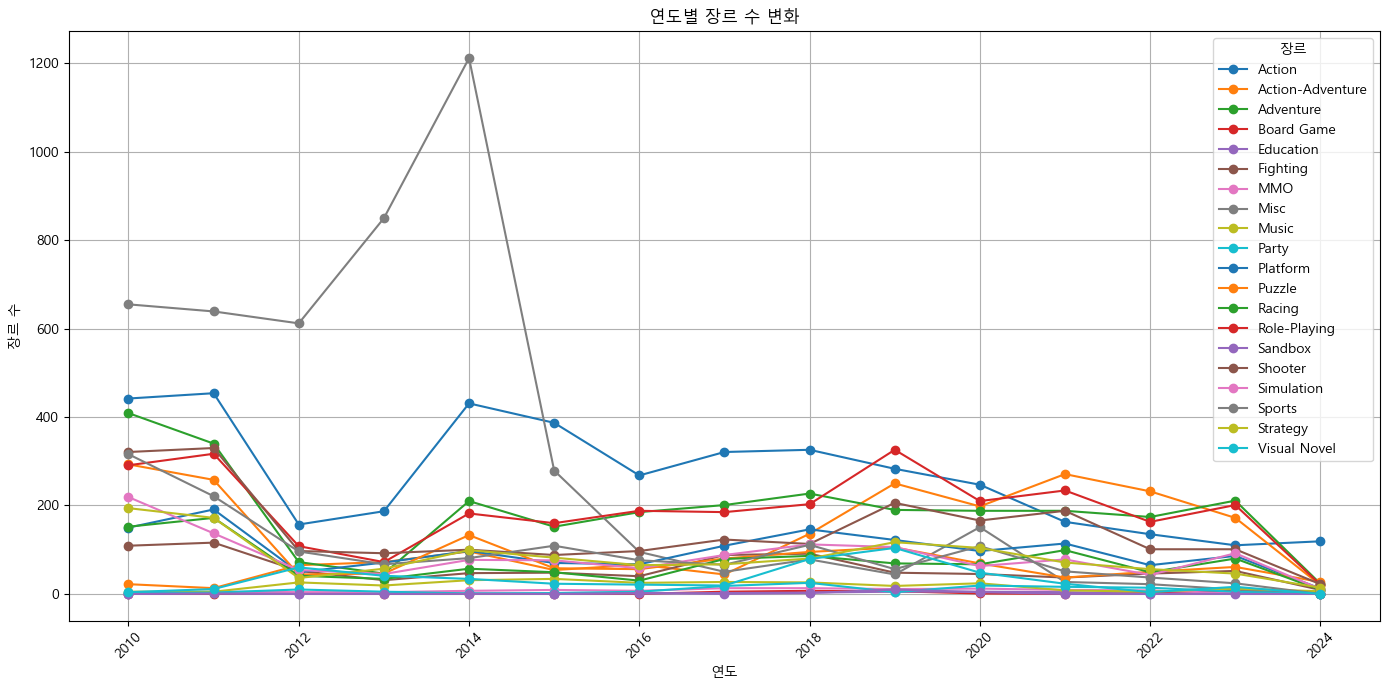

In [21]:
# 연도별 장르 카운트
genre_counts_by_year = df_data.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(14, 7))

# 각 장르별 판매량 변화 시각화
for genre in genre_counts_by_year.columns:
    plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], marker='o', label=genre)

# 그래프 설정
plt.title('연도별 장르 수 변화')
plt.xlabel('연도')
plt.ylabel('장르 수')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

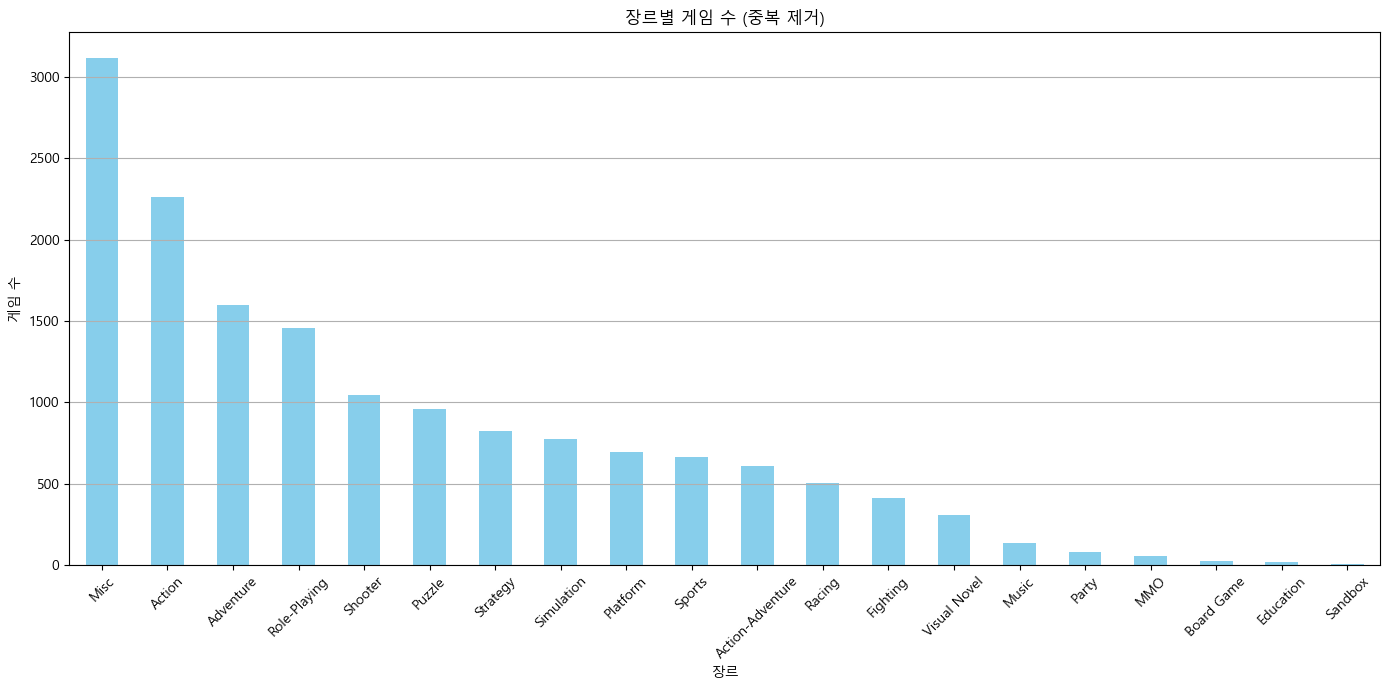

In [22]:
# 중복된 제목을 제거한 후 장르별 카운트
unique_titles = df_data.drop_duplicates(subset=['title'])
genre_counts = unique_titles['genre'].value_counts()

# 시각화
plt.figure(figsize=(14, 7))

# 장르별 카운트 시각화
genre_counts.plot(kind='bar', color='skyblue')

# 그래프 설정
plt.title('장르별 게임 수 (중복 제거)')
plt.xlabel('장르')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


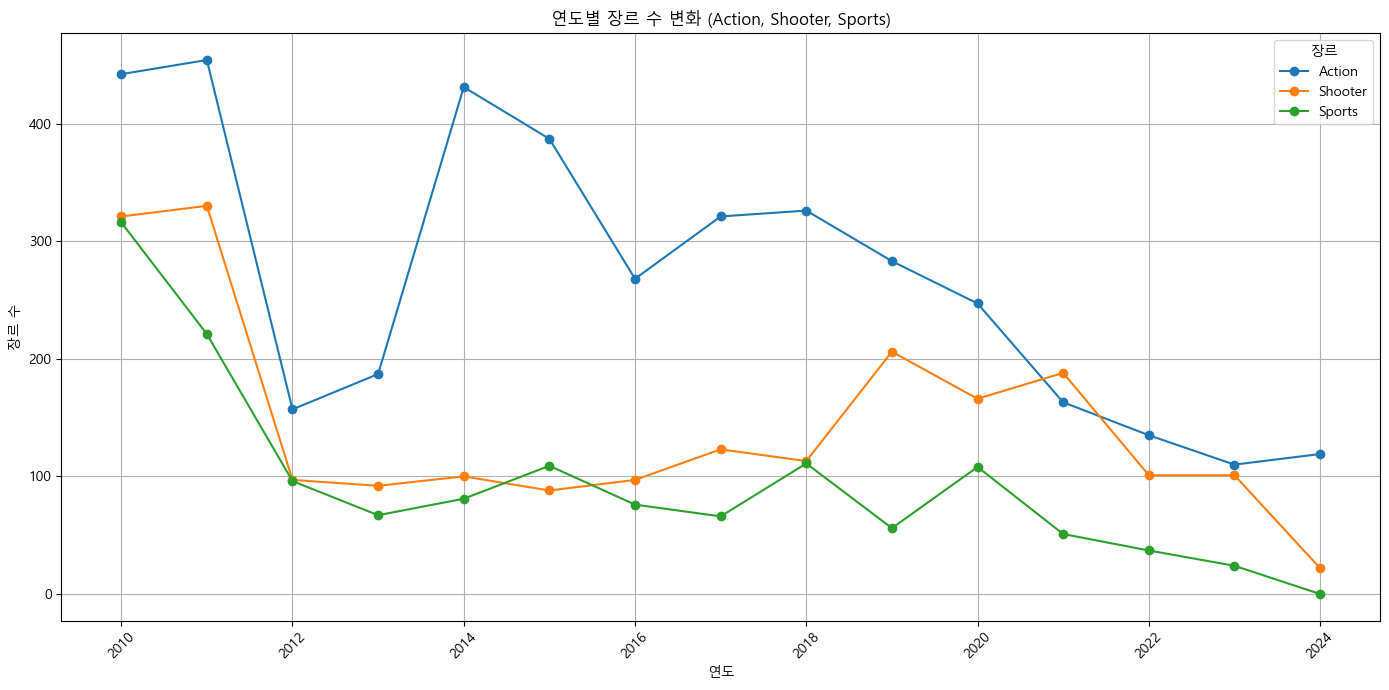

In [23]:
# 연도별 장르 카운트
genre_counts_by_year = df_data.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# 원하는 장르만 선택
selected_genres = ['Action', 'Shooter', 'Sports']
filtered_genre_counts = genre_counts_by_year[selected_genres]

# 시각화
plt.figure(figsize=(14, 7))

# 각 장르별 판매량 변화 시각화
for genre in filtered_genre_counts.columns:
    plt.plot(filtered_genre_counts.index, filtered_genre_counts[genre], marker='o', label=genre)

# 그래프 설정
plt.title('연도별 장르 수 변화 (Action, Shooter, Sports)')
plt.xlabel('연도')
plt.ylabel('장르 수')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()


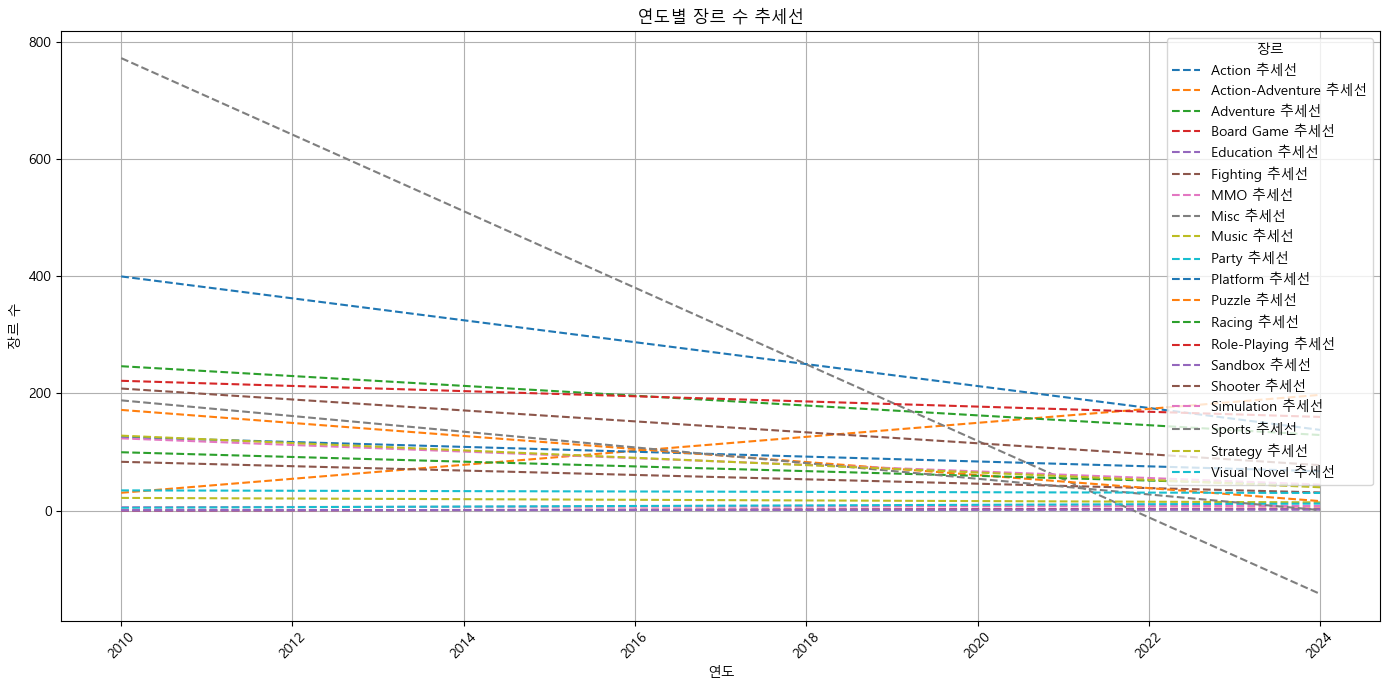

In [24]:
# 연도별 장르 카운트
genre_counts_by_year = df_data.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(14, 7))

# 각 장르별 추세선 추가
for genre in genre_counts_by_year.columns:
    # 선형 회귀를 위한 다항식 피팅
    z = np.polyfit(genre_counts_by_year.index, genre_counts_by_year[genre], 1)
    p = np.poly1d(z)
    
    # 추세선 그리기
    plt.plot(genre_counts_by_year.index, p(genre_counts_by_year.index), linestyle='--', label=f'{genre} 추세선')

# 그래프 설정
plt.title('연도별 장르 수 추세선')
plt.xlabel('연도')
plt.ylabel('장르 수')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

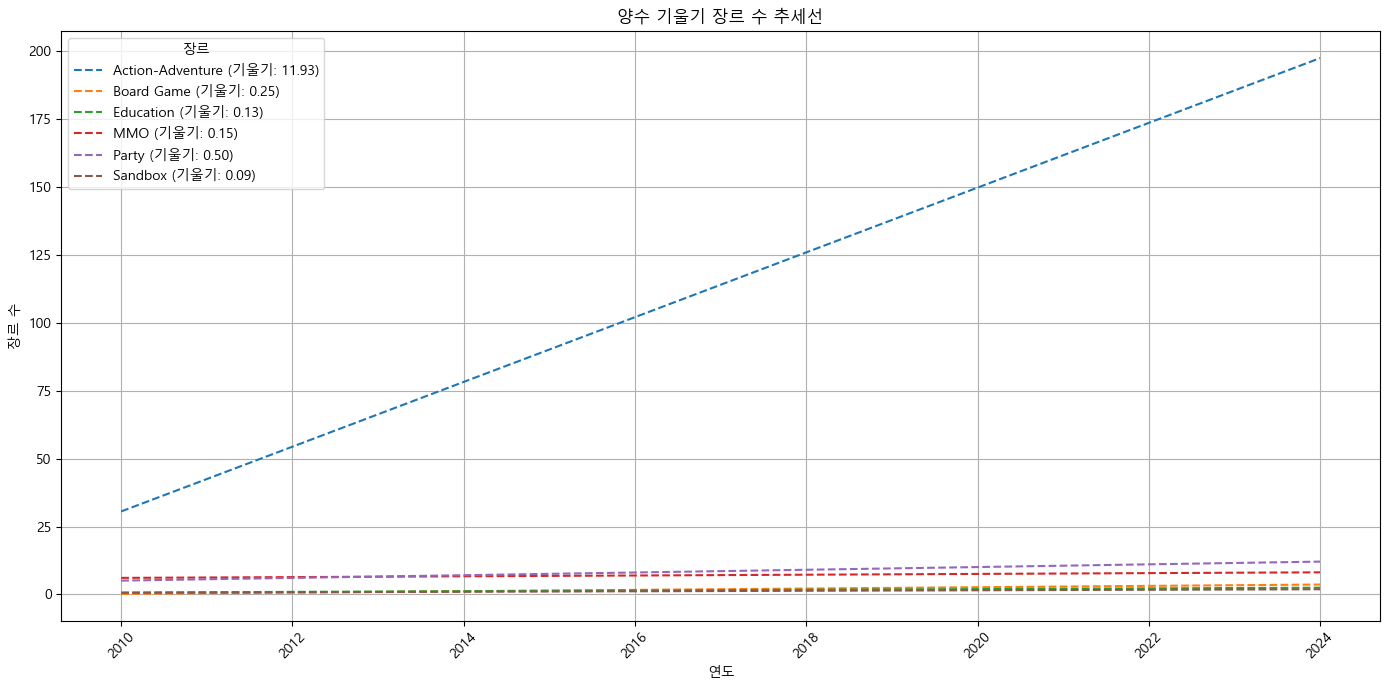

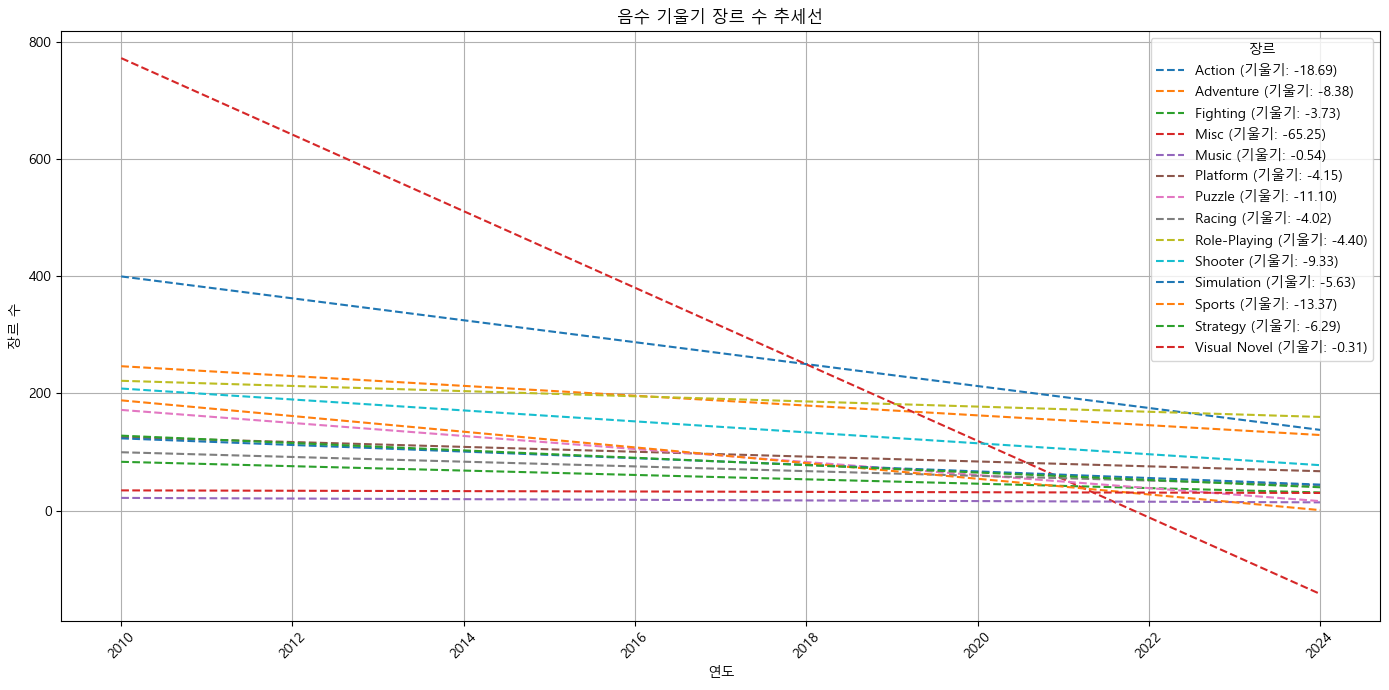

In [25]:
# 연도별 장르 카운트
genre_counts_by_year = df_data.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# 추세선 기울기를 저장할 딕셔너리
slope_dict = {}

# 각 장르별 기울기 계산
for genre in genre_counts_by_year.columns:
    z = np.polyfit(genre_counts_by_year.index, genre_counts_by_year[genre], 1)
    slope_dict[genre] = z[0]  # 기울기 저장

# 기울기를 기준으로 장르 분리
positive_slopes = {genre: slope for genre, slope in slope_dict.items() if slope > 0}
negative_slopes = {genre: slope for genre, slope in slope_dict.items() if slope <= 0}

# 양수 기울기 장르의 추세선 시각화
plt.figure(figsize=(14, 7))
for genre in positive_slopes.keys():
    z = np.polyfit(genre_counts_by_year.index, genre_counts_by_year[genre], 1)
    p = np.poly1d(z)
    plt.plot(genre_counts_by_year.index, p(genre_counts_by_year.index), linestyle='--', label=f'{genre} (기울기: {slope_dict[genre]:.2f})')

plt.title('양수 기울기 장르 수 추세선')
plt.xlabel('연도')
plt.ylabel('장르 수')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

# 음수 기울기 장르의 추세선 시각화
plt.figure(figsize=(14, 7))
for genre in negative_slopes.keys():
    z = np.polyfit(genre_counts_by_year.index, genre_counts_by_year[genre], 1)
    p = np.poly1d(z)
    plt.plot(genre_counts_by_year.index, p(genre_counts_by_year.index), linestyle='--', label=f'{genre} (기울기: {slope_dict[genre]:.2f})')

plt.title('음수 기울기 장르 수 추세선')
plt.xlabel('연도')
plt.ylabel('장르 수')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

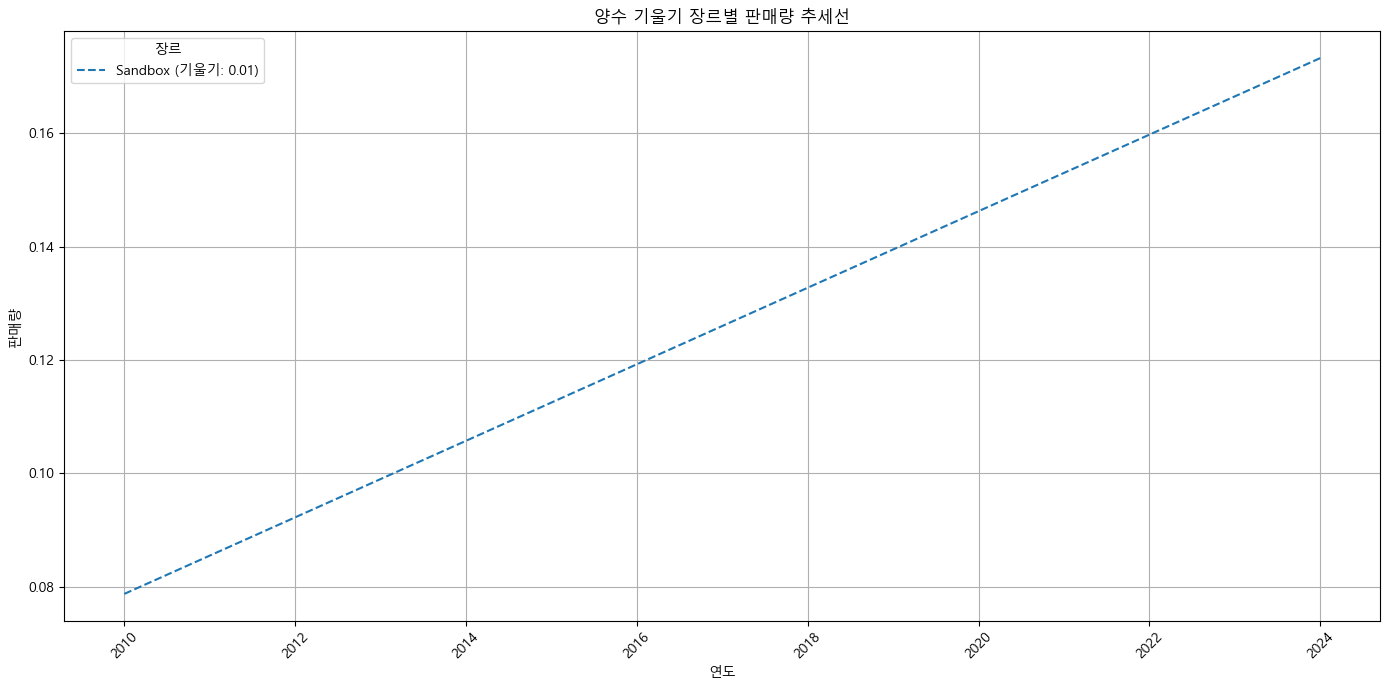

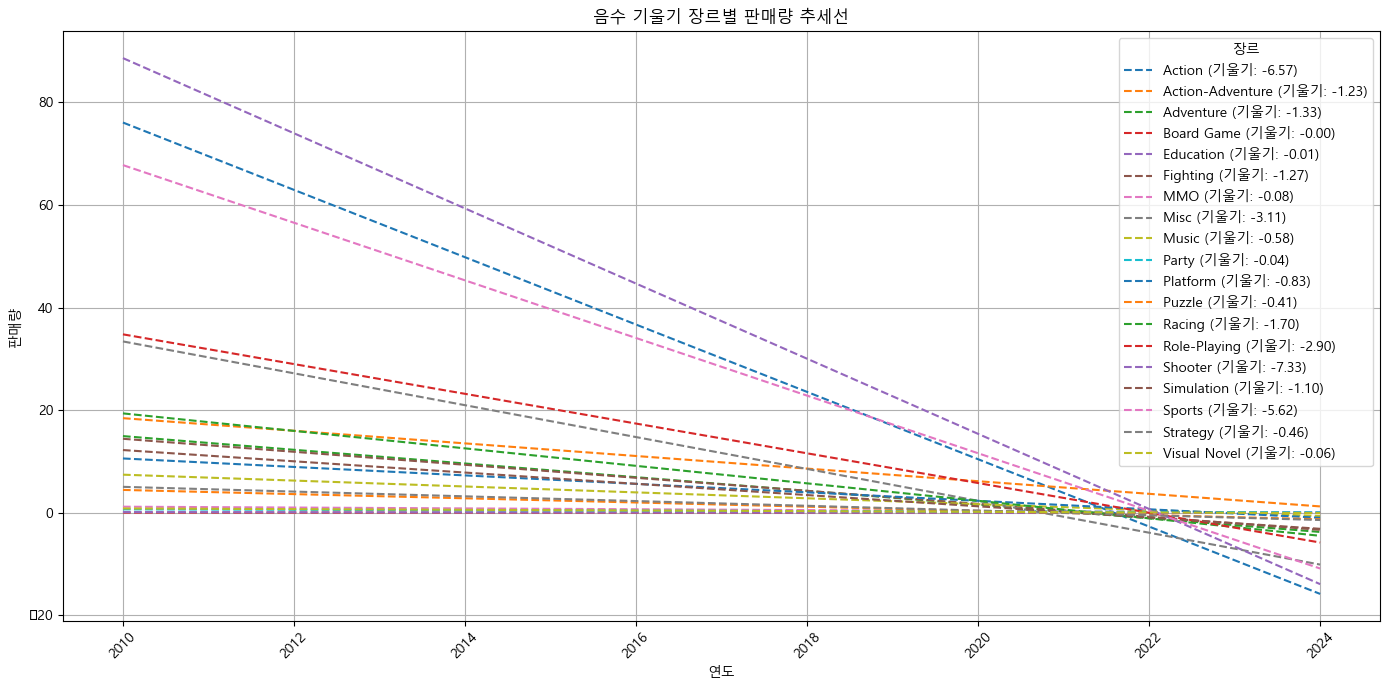

In [26]:
# 장르별 총 판매량 집계
genre_sales_by_year = df_data.groupby(['release_year', 'genre'])['total_sales'].sum().unstack(fill_value=0)

# 추세선 기울기를 저장할 딕셔너리
slope_dict = {}

# 각 장르별 기울기 계산
for genre in genre_sales_by_year.columns:
    z = np.polyfit(genre_sales_by_year.index, genre_sales_by_year[genre], 1)
    slope_dict[genre] = z[0]  # 기울기 저장

# 기울기를 기준으로 장르 분리
positive_slopes = {genre: slope for genre, slope in slope_dict.items() if slope > 0}
negative_slopes = {genre: slope for genre, slope in slope_dict.items() if slope <= 0}

# 양수 기울기 장르의 추세선 시각화
plt.figure(figsize=(14, 7))
for genre in positive_slopes.keys():
    z = np.polyfit(genre_sales_by_year.index, genre_sales_by_year[genre], 1)
    p = np.poly1d(z)
    plt.plot(genre_sales_by_year.index, p(genre_sales_by_year.index), linestyle='--', label=f'{genre} (기울기: {slope_dict[genre]:.2f})')

plt.title('양수 기울기 장르별 판매량 추세선')
plt.xlabel('연도')
plt.ylabel('판매량')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

# 음수 기울기 장르의 추세선 시각화
plt.figure(figsize=(14, 7))
for genre in negative_slopes.keys():
    z = np.polyfit(genre_sales_by_year.index, genre_sales_by_year[genre], 1)
    p = np.poly1d(z)
    plt.plot(genre_sales_by_year.index, p(genre_sales_by_year.index), linestyle='--', label=f'{genre} (기울기: {slope_dict[genre]:.2f})')

plt.title('음수 기울기 장르별 판매량 추세선')
plt.xlabel('연도')
plt.ylabel('판매량')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

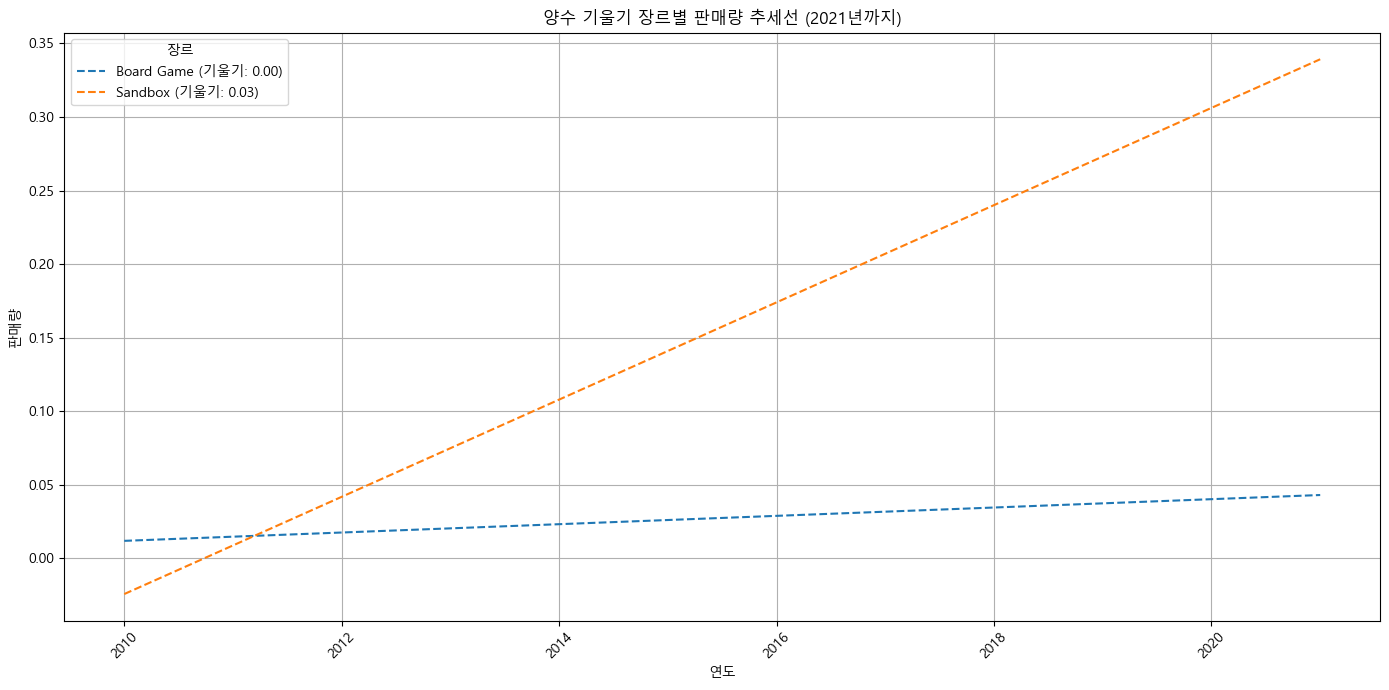

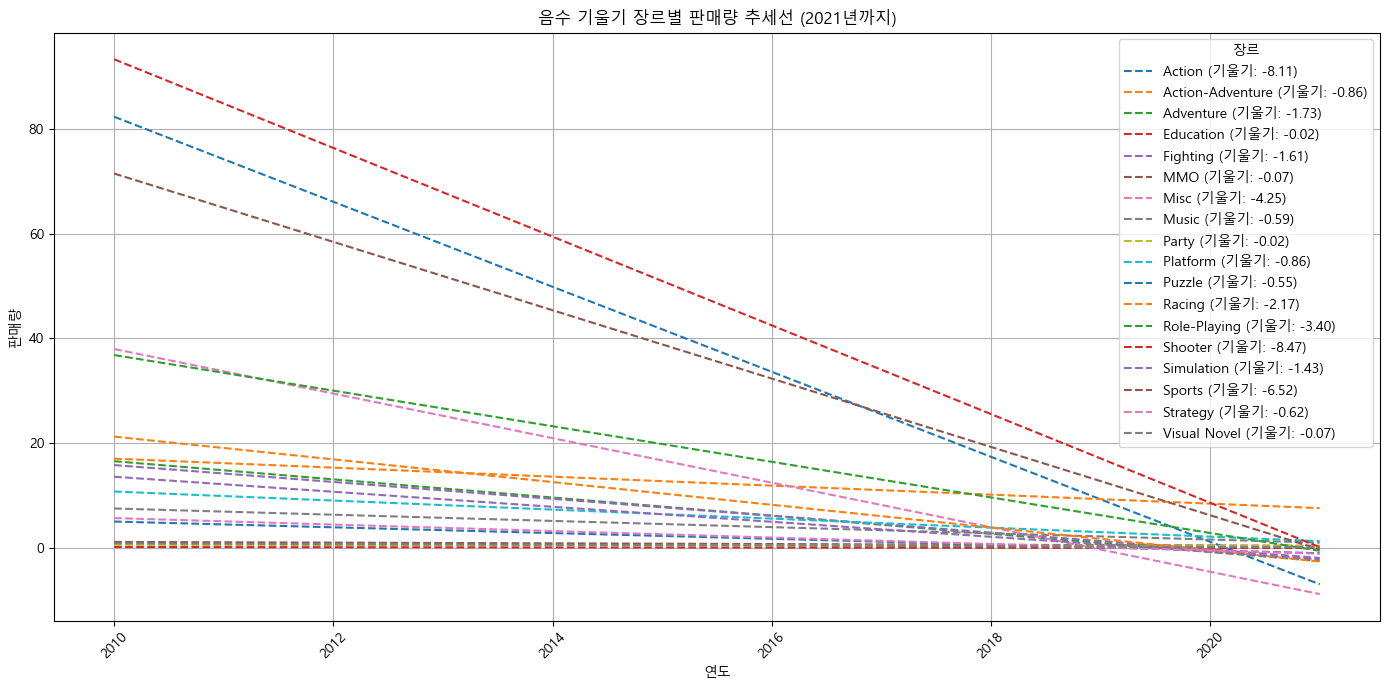

In [42]:
# 장르별 총 판매량 집계
genre_sales_by_year = df_data.groupby(['release_year', 'genre'])['total_sales'].sum().unstack(fill_value=0)

# 2021년까지만 필터링
genre_sales_by_year = genre_sales_by_year.loc[genre_sales_by_year.index <= 2021]

# 추세선 기울기를 저장할 딕셔너리
slope_dict = {}

# 각 장르별 기울기 계산
for genre in genre_sales_by_year.columns:
    z = np.polyfit(genre_sales_by_year.index, genre_sales_by_year[genre], 1)
    slope_dict[genre] = z[0]  # 기울기 저장

# 기울기를 기준으로 장르 분리
positive_slopes = {genre: slope for genre, slope in slope_dict.items() if slope > 0}
negative_slopes = {genre: slope for genre, slope in slope_dict.items() if slope <= 0}

# 양수 기울기 장르의 추세선 시각화
plt.figure(figsize=(14, 7))
for genre in positive_slopes.keys():
    z = np.polyfit(genre_sales_by_year.index, genre_sales_by_year[genre], 1)
    p = np.poly1d(z)
    plt.plot(genre_sales_by_year.index, p(genre_sales_by_year.index), linestyle='--', label=f'{genre} (기울기: {slope_dict[genre]:.2f})')

plt.title('양수 기울기 장르별 판매량 추세선 (2021년까지)')
plt.xlabel('연도')
plt.ylabel('판매량')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

# 음수 기울기 장르의 추세선 시각화
plt.figure(figsize=(14, 7))
for genre in negative_slopes.keys():
    z = np.polyfit(genre_sales_by_year.index, genre_sales_by_year[genre], 1)
    p = np.poly1d(z)
    plt.plot(genre_sales_by_year.index, p(genre_sales_by_year.index), linestyle='--', label=f'{genre} (기울기: {slope_dict[genre]:.2f})')

plt.title('음수 기울기 장르별 판매량 추세선 (2021년까지)')
plt.xlabel('연도')
plt.ylabel('판매량')
plt.xticks(rotation=45)
plt.legend(title='장르')
plt.grid()
plt.tight_layout()
plt.show()

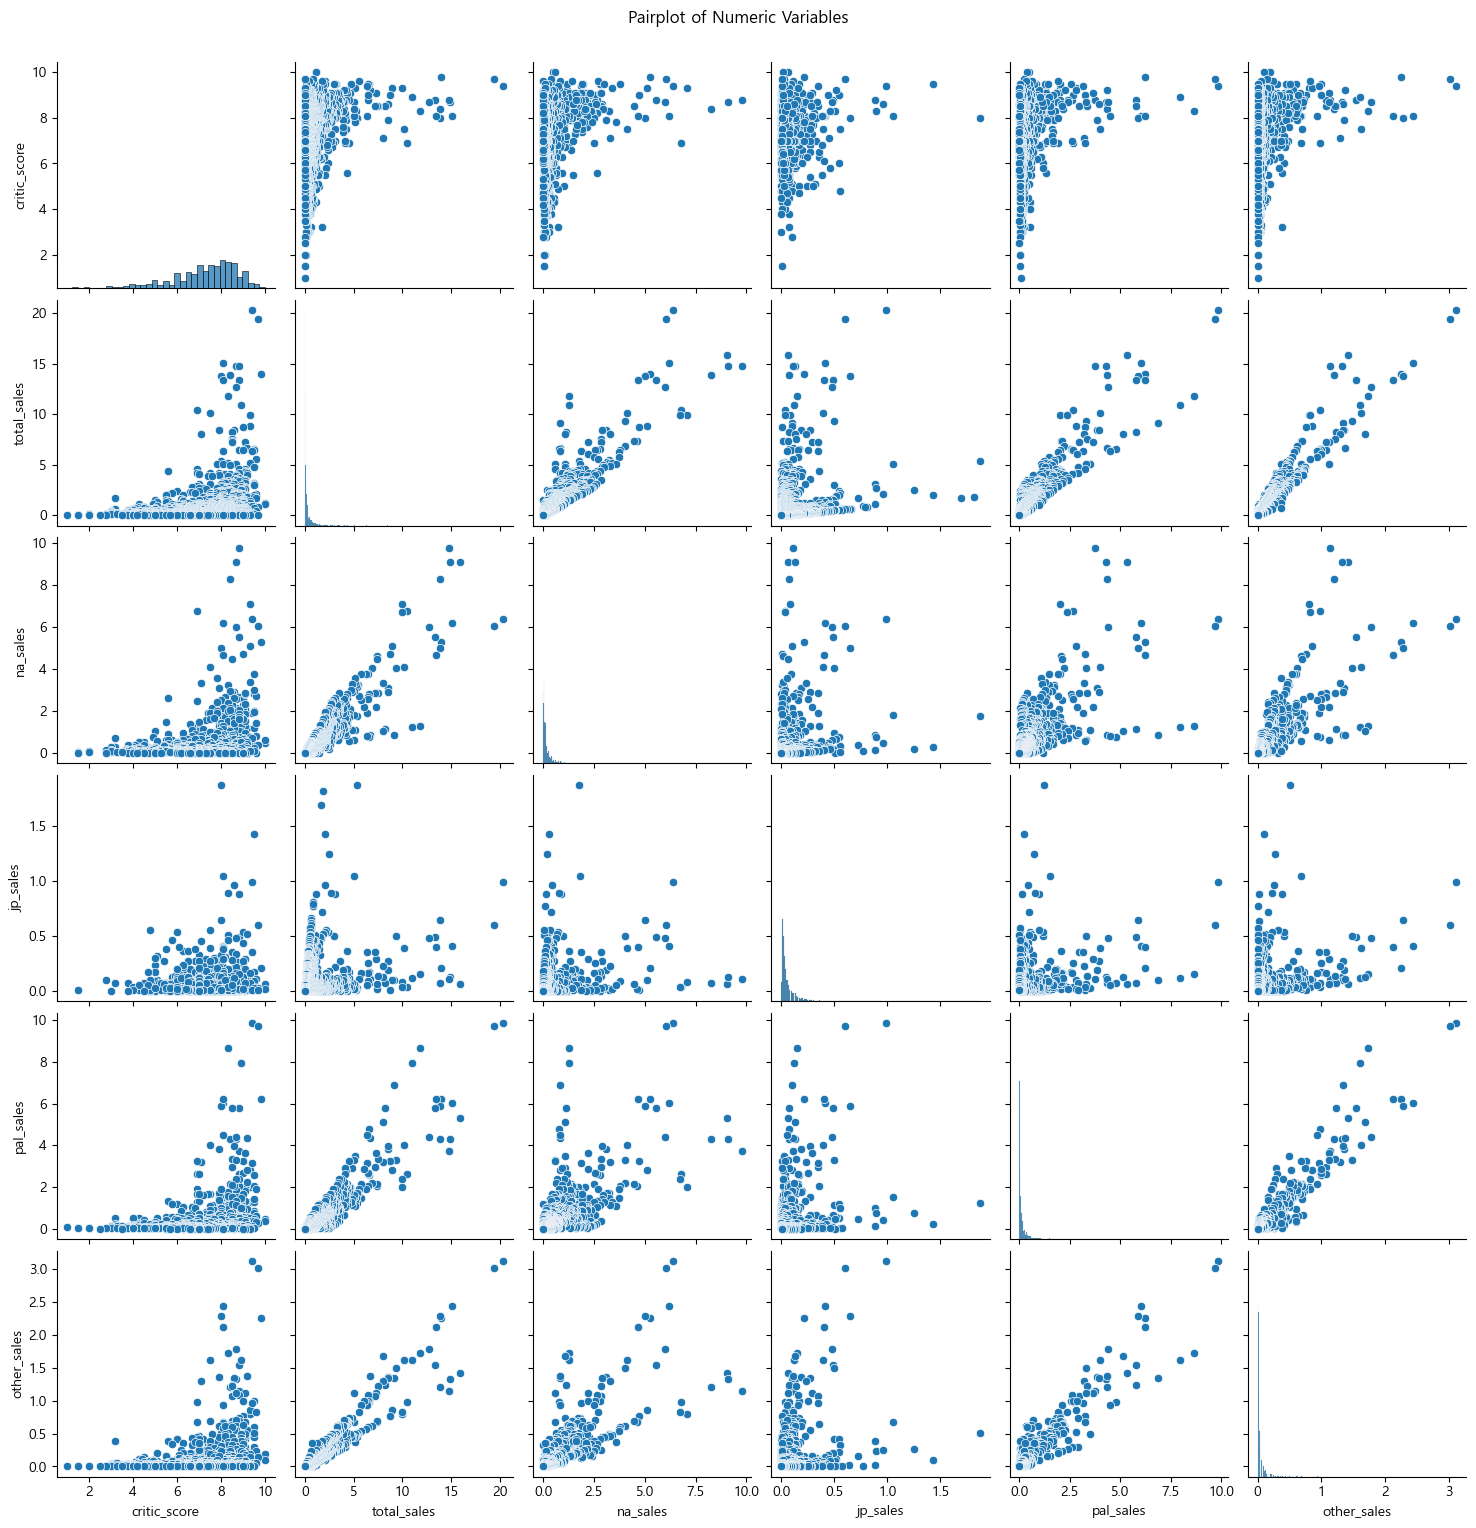

In [35]:
# 수치형 변수만 선택
numeric_columns = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# pairplot 그리기
sns.pairplot(df_data[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)  # 제목 추가
plt.show()

In [47]:
import scipy.stats as stats

# NaN 값을 가진 행을 제거합니다.
df_cleaned = df_data.dropna(subset=["total_sales"])

# 퍼블리셔별로 total_sales를 그룹화합니다.
grouped_data = [group["total_sales"].values for name, group in df_cleaned.groupby("publisher")]

# ANOVA 테스트 수행
f_statistic, p_value = stats.f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# p-value 해석
alpha = 0.05
if p_value < alpha:
    print("퍼블리셔 간에 판매량의 차이가 유의미합니다.")
else:
    print("퍼블리셔 간에 판매량의 차이가 유의미하지 않습니다.")

F-statistic: 3.7809981359259193
p-value: 1.2433878416240428e-117
퍼블리셔 간에 판매량의 차이가 유의미합니다.


genre
Sports              0.300796
Shooter             0.261263
Music               0.187823
Action              0.112141
Racing              0.103961
Sandbox             0.099474
Fighting            0.096775
Action-Adventure    0.086224
MMO                 0.084019
Role-Playing        0.075959
Simulation          0.054146
Platform            0.049813
Party               0.043178
Misc                0.036983
Adventure           0.029822
Education           0.025417
Strategy            0.021611
Puzzle              0.016891
Visual Novel        0.011725
Board Game          0.011379
dtype: float64


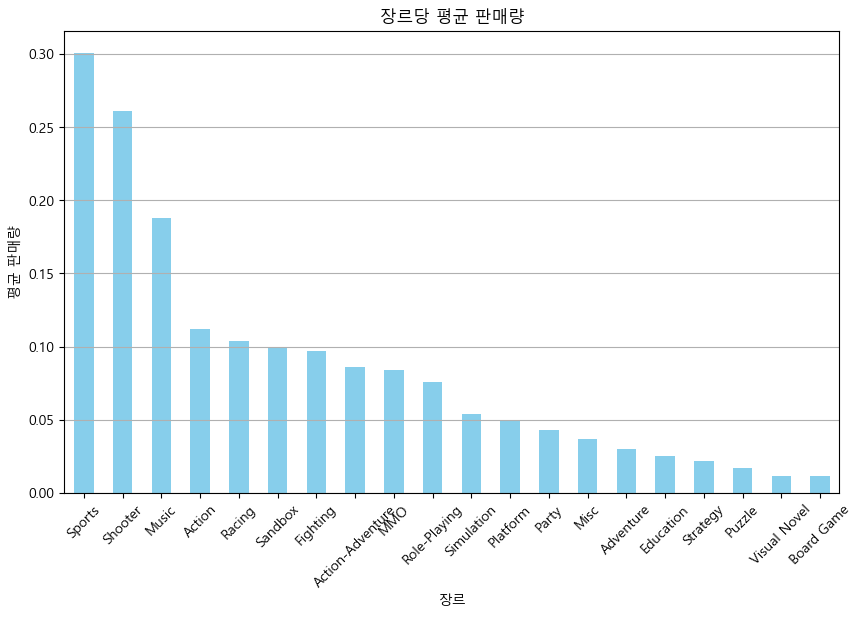

In [52]:
# 각 장르별 판매량 계산
genre_counts = df_data['genre'].value_counts()
genre_sales = df_data.groupby('genre')['total_sales'].sum()

# 장르당 평균 판매량 계산
average_sales_per_genre = genre_sales / genre_counts

# 평균 판매량을 내림차순으로 정렬
average_sales_per_genre = average_sales_per_genre.sort_values(ascending=False)

# 결과 출력
print(average_sales_per_genre)

# 시각화
plt.figure(figsize=(10, 6))
average_sales_per_genre.plot(kind='bar', color='skyblue')
plt.title('장르당 평균 판매량')
plt.xlabel('장르')
plt.ylabel('평균 판매량')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()